In [3]:
import pandas as pd
import numpy as np

## My Package

In [4]:
# DISTRIBUTIONS (NORMAL AND T)
from risk_management import distributions

# mu_vector, covariance_matrix = fit_multivariate_normal_dist(x: pd.DataFrame)

# mu, sigma, nu = fit_univariate_t_dist(x)

# alpha, betas, mu, sigma, nu = t_regression(X: pd.DataFrame, y:pd.Series, add_constant:bool = True, print_summary = False)

In [5]:
# MEASUREMENTS (CORRELATION, COVARIANCE, FACTORIZATIONS, RETURNS)
from risk_management import measurements

# corr = compute_correlation(x:pd.DataFrame, method="pearson", drop_missing = False, exponentially_weighted = False, lambda_ = 0.97, ddof: int =1)

# cov = compute_covariance(x:pd.DataFrame, drop_missing = False, exponentially_weighted = False, lambda_ = 0.97, ddof:int=1)

# cov = compute_covariance_with_ew_corr(x: pd.DataFrame, corr_lambda, var_lambda)

# psd = near_psd(A: pd.DataFrame, epsilon = 0.0)
# psd = higham_psd(A: pd.DataFrame, tolerance = 1e-8, max_iterations= 100_000)

# A = cholesky_factor(x:pd.DataFrame)

# returns = compute_returns(x: pd.DataFrame, return_type = "arithmetic")


In [6]:
# RISK METRICS (VAR, ES)
from risk_management import risk_metrics

# NOTE -> all of these assume that X was a set of RETURNS, not prices

# abs_VaR, rel_VaR = univariate_normal_VaR(mean: float, std: float, alpha = 0.05)

# nu, mu, sigma = t.fit(x)
# abs_VaR, rel_VaR = univariate_t_VaR(mu: float, sigma: float, nu: float, alpha: float = 0.05)

# abs_ES, diff_ES = expected_shortfall_normal(mu:float, sigma: float, alpha = 0.05)

# mu, sigma, nu = fit_univariate_t_dist(x)
# abs_ES, diff_ES = expected_shortfall_t(mu: float, sigma: float, nu: float, alpha: float = 0.05)



In [7]:
## SIMULATIONS
from risk_management import simulations

# NOTE -> all of these assume that X was a set of RETURNS, not prices

# simulation_data = normal_monte_carlo_simulation(mean_vector, covariance_matrix, n_sims, fix_method, seed=1234) # len(cov), n_sims

# simulation_data = pca_monte_carlo_simulation(mean_vector, covariance_matrix, n_sims, explained_threshold = 0.99, seed=1234) # len(cov), n_sims

# current_prices = vector of start prices of assets, holdings = vector of how many of each asset we have
# abs_VaR, rel_VaR = monte_carlo_VaR_sim(mean_vector, covariance_matrix, current_prices, holdings, n_draws, return_type = "arithmetic", alpha = 0.05, seed = 1234) 

# sim_dataframe = VaR_ES_2_level_sim_from_copula(sample_data: pd.DataFrame, holdings: np.array, prices: np.array, fix_method, n_sims = 100_000, alpha=0.05, seed=1234)

## Problem 1

In [ ]:
# No code needed for problem 1

## Problem 2

In [8]:
data_2 = pd.read_csv("problem2.csv")

In [9]:
from scipy.stats import skew, kurtosis

mean = np.mean(data_2)
var = np.var(data_2, ddof=1) #ddof = 0 means /n -> biased, 1 means / (n-1) -> unbiased)
sk = skew(data_2, bias= False) # biased for population, unbiased for sample
kurt = kurtosis(data_2, fisher=True, bias=False) # fisher means -3 (normal has kurt of 0) -> excess kurtosis

/Users/willneuner/Desktop/FINTECH545/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:4266: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [10]:
mean, var

(np.float64(-0.0003457749550813146),
 X    0.000485
 dtype: float64)

In [11]:
sk

array([0.11425266])

In [12]:
kurt

array([0.96838872])

In [49]:
mu_vector, covariance_matrix = distributions.fit_multivariate_normal_dist(data_2)

mu, sigma, nu = distributions.fit_univariate_t_dist(data_2)

In [14]:
# normal

norm_mean = mu_vector.iloc[0]
norm_sigma = np.sqrt(covariance_matrix.iloc[0,0])
print(norm_mean, norm_sigma)

-0.0003457749550813146 0.02203232224742731


In [15]:
# t
print(mu, sigma, nu)

-0.0004775894210559369 0.019398966622270863 8.85936027362565


## Problem 3

In [16]:
norm_mean, norm_sigma
# use 0.0 instead of the actual mean (or just use rel_vAr)
abs_VaR_norm, rel_VaR_norm = risk_metrics.univariate_normal_VaR(0.0, norm_sigma, alpha = 0.05)

abs_VaR_t, rel_VaR_t = risk_metrics.univariate_t_VaR(0.0, sigma, nu, alpha=0.05)

abs_ES_norm, diff_ES_norm = risk_metrics.expected_shortfall_normal(0.0, norm_sigma, alpha = 0.05)

abs_ES_t, diff_ES_t = risk_metrics.expected_shortfall_t(0.0, sigma, nu, alpha = 0.05)

In [17]:
abs_VaR_norm

np.float64(0.03623994515884444)

In [18]:
abs_VaR_t

np.float64(0.035624875050607886)

In [19]:
abs_ES_norm

np.float64(0.04544635327889909)

In [20]:
abs_ES_t

np.float64(0.04775264153306842)

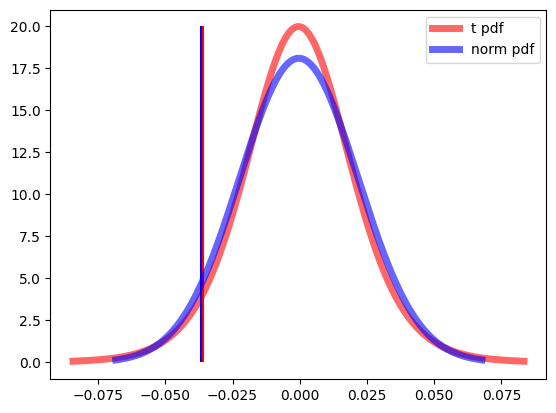

In [68]:
import numpy as np
from scipy.stats import t, norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

df = nu
x = np.linspace(t.ppf(0.001, df, loc=mu, scale=sigma),
                t.ppf(0.999, df, loc=mu, scale=sigma), 10000)
ax.plot(x, t.pdf(x, df, loc=mu, scale=sigma),
       'r-', lw=5, alpha=0.6, label='t pdf')

plt.vlines(t.ppf(0.05, df, loc=mu, scale=sigma), 0, 20, colors="r")


x = np.linspace(norm.ppf(0.001,loc=norm_mean, scale=norm_sigma),
                norm.ppf(0.999,loc=norm_mean, scale=norm_sigma), 10000)
ax.plot(x, norm.pdf(x, loc=norm_mean, scale=norm_sigma),
       'b-', lw=5, alpha=0.6, label='norm pdf')

plt.vlines(norm.ppf(0.05, loc=norm_mean, scale=norm_sigma), 0, 20, colors="b")
plt.legend()
# ax.plot()

## Problem 4

In [21]:
data_4 = pd.read_csv("problem4.csv")

In [22]:
corr = measurements.compute_correlation(data_4, method="pearson", drop_missing = False, exponentially_weighted = True, lambda_ = 0.94, ddof =1)

In [23]:
corr

,x1,x2,x3
x1,1.000000,0.711329,0.807175
x2,0.711329,1.000000,0.713020
x3,0.807175,0.713020,1.000000


In [24]:
cov = measurements.compute_covariance(data_4, drop_missing = False, exponentially_weighted = True, lambda_ = 0.97, ddof=1)
np.diag(cov)

array([0.01537881, 0.03551743, 0.02781346])

In [25]:
cov_ew_corr = measurements.compute_covariance_with_ew_corr(data_4, corr_lambda=0.94, var_lambda=0.97)
cov_ew_corr

,x1,x2,x3
x1,0.015379,0.016625,0.016694
x2,0.016625,0.035517,0.022410
x3,0.016694,0.022410,0.027813


In [26]:
data_4

,x1,x2,x3
0,0.034246,0.121262,-0.115528
1,0.131169,0.192027,0.043622
2,0.125515,-0.108881,-0.004787
3,0.157331,0.033694,0.109034
4,-0.119847,-0.249491,-0.234808
...,...,...,...
495,-0.087194,-0.062952,-0.125135
496,-0.015536,-0.134150,0.012078
497,-0.182251,-0.144493,-0.240579
498,0.167292,0.207168,0.128010


## Problem 5

In [27]:
data_5 = pd.read_csv("problem5.csv")

In [28]:
cov = measurements.compute_covariance(data_5, drop_missing = False, exponentially_weighted = False, lambda_ = 0.97, ddof = 1)

In [29]:
cov

,x1,x2,x3,x4,x5
x1,1.470484,1.454214,0.877269,1.903226,1.444361
x2,1.454214,1.252078,0.539548,1.621918,1.237877
x3,0.877269,0.539548,1.272425,1.171959,1.091912
x4,1.903226,1.621918,1.171959,1.814469,1.589729
x5,1.444361,1.237877,1.091912,1.589729,1.396186


In [30]:
# find the determinism of the matrix
eigvals, eigvecs = np.linalg.eigh(cov)
eigvals

array([-0.31024286, -0.13323183,  0.02797828,  0.83443367,  6.78670573])

In [31]:
# Matrix IS non-definite, use higham to fix
psd = measurements.higham_psd(cov, tolerance = 1e-30, max_iterations= 100_000)
psd

array([[1.47048437, 1.33236075, 0.88437762, 1.62760182, 1.3995556 ],
       [1.33236075, 1.25207795, 0.61902799, 1.4506041 , 1.21445034],
       [0.88437762, 0.61902799, 1.272425  , 1.07684649, 1.05965831],
       [1.62760182, 1.4506041 , 1.07684649, 1.81446921, 1.57792823],
       [1.3995556 , 1.21445034, 1.05965831, 1.57792823, 1.39618646]])

In [32]:
eigvals, eigvecs = np.linalg.eigh(psd)
eigvals

array([1.66573288e-16, 9.33125467e-16, 2.16398622e-15, 7.36663625e-01,
       6.46897936e+00])

In [33]:
# Variance explained for each of our principal components
# pulled from simulations.pca_monte_carlo_simulation()
eigvals, eigvecs = np.linalg.eigh(psd)
eigvals = np.clip(eigvals, 0, None)
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

k = len(eigvals)
pct_explained = eigvals[:k] / eigvals.sum()
print(eigvals)
print(pct_explained)

for i in range(5):
    print(f"Cummulative: {i}", eigvals[:i+1].sum() / eigvals.sum())

[6.46897936e+00 7.36663625e-01 2.16398622e-15 9.33125467e-16
 1.66573288e-16]
[8.97765734e-01 1.02234266e-01 3.00318268e-16 1.29499264e-16
 2.31170609e-17]
Cummulative: 0 0.8977657335513296
Cummulative: 1 0.9999999999999997
Cummulative: 2 0.9999999999999999
Cummulative: 3 1.0
Cummulative: 4 1.0


## Problem 6

In [34]:
data_6 = pd.read_csv("problem6.csv")
c = data_6.set_index("Date")

In [35]:
data_6

,x1,x2,x3,Date
0,102.975983,101.234230,101.390965,2025-01-01
1,102.553769,102.056711,103.589863,2025-01-02
2,102.362551,100.605815,99.204933,2025-01-03
3,104.522707,100.479907,101.798573,2025-01-04
4,103.682209,100.637430,101.599604,2025-01-05
...,...,...,...,...
245,79.313328,74.647039,78.285858,2025-09-03
246,78.871520,74.591839,77.059249,2025-09-04
247,80.080646,74.965529,77.739804,2025-09-05
248,81.411350,75.702936,79.729444,2025-09-06


In [36]:
# returns
returns = measurements.compute_returns(c, return_type = "arithmetic")
returns

,x1,x2,x3
Date,,,
2025-01-02,-0.004100,0.008125,0.021687
2025-01-03,-0.001865,-0.014217,-0.042330
2025-01-04,0.021103,-0.001252,0.026144
2025-01-05,-0.008041,0.001568,-0.001955
2025-01-06,-0.003674,-0.006858,-0.027222
...,...,...,...
2025-09-03,-0.017321,-0.029331,-0.002462
2025-09-04,-0.005570,-0.000739,-0.015668
2025-09-05,0.015330,0.005010,0.008832


In [37]:
demeaned_returns = returns - returns.mean()
demeaned_returns.mean()

x1   -8.638784e-19
x2    1.476953e-18
x3   -3.148976e-18
dtype: float64

In [38]:
x1 = demeaned_returns['x1']
mu1, sigma1, nu1 = distributions.fit_univariate_t_dist(x1)
x2 = demeaned_returns['x2']
mu2, sigma2, nu2 = distributions.fit_univariate_t_dist(x2)
x3 = demeaned_returns['x3']
mu3, sigma3, nu3 = distributions.fit_univariate_t_dist(x3)

In [39]:
mu1, sigma1, nu1

(np.float64(-0.0004786520929827172),
 np.float64(0.012907549628639717),
 np.float64(4.729830909131829))

In [40]:
mu2, sigma2, nu2

(np.float64(-4.350220543514708e-05),
 np.float64(0.009058419601620012),
 np.float64(6.766945042505089))

In [41]:
mu3, sigma3, nu3

(np.float64(7.48934264331786e-05),
 np.float64(0.01706272432180566),
 np.float64(39.864383658541556))

In [69]:
c.iloc[-1]

x1    83.063214
x2    77.404861
x3    82.156148
Name: 2025-09-07, dtype: float64

In [42]:
prices = np.array(c.iloc[-1])
prices

array([83.06321359, 77.40486139, 82.1561478 ])

In [43]:
# FROM THE simulations.VaR_ES_2_level_sim_from_copula() function
from scipy.stats import norm
means, cov = distributions.fit_multivariate_normal_dist(returns)

quantile_vectors = pd.DataFrame()

for i, column in enumerate(returns.columns):
    mean = means.iloc[i]
    sigma = np.sqrt(cov.iloc[i,i])
    # print(i, column, mean, sigma)
    col_data = returns.loc[:, column]
    U_vector = norm.cdf(col_data, loc=mean, scale=sigma) # get U from observations
    Z_vector = norm.ppf(U_vector, loc=0, scale = 1) # get Z from U vectors (not needed if using spearman correlation)
    quantile_vectors[column] = Z_vector

corr = measurements.compute_correlation(quantile_vectors, method="spearman")
corr

,x1,x2,x3
x1,1.000000,0.446299,0.394197
x2,0.446299,1.000000,0.511761
x3,0.394197,0.511761,1.000000


In [46]:
# simulation using Gaussian Copula
# TODO -> I didn't set this function up well, as the covariance/correlation matrix is computed inside of the function instead of before and then passed in
import numpy as np
prices = np.array(c.iloc[-1])
holdings = np.ones(3)

sim_dataframe = simulations.VaR_ES_2_level_sim_from_copula(sample_data=returns, holdings=holdings, prices=prices, fix_method=measurements.near_psd, n_sims = 1_000_000, alpha=0.05, seed=1234)

In [48]:
prices

array([83.06321359, 77.40486139, 82.1561478 ])

In [47]:
sim_dataframe

,Stock,VaR95,ES95,VaR95_Pct,ES95_Pct
0,x1,2.349574,2.931951,0.028287,0.035298
1,x2,1.449216,1.797698,0.018723,0.023225
2,x3,2.429033,3.030823,0.029566,0.036891
3,Total,5.008485,6.231784,0.020643,0.025685
